In [1]:
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()
import pyspark.sql.types as T
import pyspark.sql.functions as F
import pandas as pd
import numpy as np

In [2]:
df = spark.read.parquet('./bus_per_date')
df.show()

+----------+--------+---------------------+-----------------+-----------------------------+------------+------------+--------+
|  사용일자|노선번호|               노선명|버스정류장ARS번호|                         역명|승차총승객수|하차총승객수|이용객수|
+----------+--------+---------------------+-----------------+-----------------------------+------------+------------+--------+
|2018-09-26|    5615|  5615번(난곡~여의도)|            21210|               난우중학교입구|          85|           1|      86|
|2018-09-26|    5528|5528번(가산동~사당역)|            18106|             가산디지털단지역|          16|         171|     187|
|2018-09-26|    5528|5528번(가산동~사당역)|            17231|               구일우성아파트|          16|          16|      32|
|2018-09-26|    5528|5528번(가산동~사당역)|            17232|               구일우성아파트|          20|         120|     140|
|2018-09-26|    5528|5528번(가산동~사당역)|            17237|                구로1동우체국|          70|          56|     126|
|2018-09-26|    5528|5528번(가산동~사당역)|            18104|         디지털3단지.영창실업|           2| 

In [3]:
#버스 대수
df.select('노선명').distinct().count()

745

In [4]:
#버스 번호 확인
df.select('노선번호').distinct().count()

649

In [5]:
df = df.orderBy("노선번호")
df.show()

+----------+--------+---------------------+-----------------+----------------------------+------------+------------+--------+
|  사용일자|노선번호|               노선명|버스정류장ARS번호|                        역명|승차총승객수|하차총승객수|이용객수|
+----------+--------+---------------------+-----------------+----------------------------+------------+------------+--------+
|2019-03-20|    0017|0017번(청암동~이촌동)|            03003|                    신용산역|         203|         443|     646|
|2019-03-20|    0017|0017번(청암동~이촌동)|            03248|                    용문시장|          90|         170|     260|
|2019-03-20|    0017|0017번(청암동~이촌동)|            03298|        청암동강변삼성아파트|          73|         138|     211|
|2019-03-20|    0017|0017번(청암동~이촌동)|            03122|                한강대교북단|         283|         202|     485|
|2019-03-20|    0017|0017번(청암동~이촌동)|            03290|             이촌2동주민센터|          38|         232|     270|
|2019-03-20|    0017|0017번(청암동~이촌동)|            03306|                      산천동|         303| 

In [6]:
#버스 노선 번호 정렬
df.select("노선번호").distinct().collect()

[Row(노선번호='0017'),
 Row(노선번호='01A'),
 Row(노선번호='01B'),
 Row(노선번호='02'),
 Row(노선번호='03'),
 Row(노선번호='04'),
 Row(노선번호='05'),
 Row(노선번호='100'),
 Row(노선번호='101'),
 Row(노선번호='1014'),
 Row(노선번호='1017'),
 Row(노선번호='102'),
 Row(노선번호='1020'),
 Row(노선번호='103'),
 Row(노선번호='104'),
 Row(노선번호='105'),
 Row(노선번호='106'),
 Row(노선번호='107'),
 Row(노선번호='108'),
 Row(노선번호='109'),
 Row(노선번호='110A'),
 Row(노선번호='110B'),
 Row(노선번호='111'),
 Row(노선번호='1111'),
 Row(노선번호='1113'),
 Row(노선번호='1114'),
 Row(노선번호='1115'),
 Row(노선번호='1116'),
 Row(노선번호='1119'),
 Row(노선번호='1120'),
 Row(노선번호='1122'),
 Row(노선번호='1124'),
 Row(노선번호='1126'),
 Row(노선번호='1127'),
 Row(노선번호='1128'),
 Row(노선번호='1129'),
 Row(노선번호='1130'),
 Row(노선번호='1131'),
 Row(노선번호='1132'),
 Row(노선번호='1133'),
 Row(노선번호='1135'),
 Row(노선번호='1136'),
 Row(노선번호='1137'),
 Row(노선번호='1138'),
 Row(노선번호='1139'),
 Row(노선번호='1140'),
 Row(노선번호='1141'),
 Row(노선번호='1142'),
 Row(노선번호='1143'),
 Row(노선번호='1144'),
 Row(노선번호='1154'),
 Row(노선번호='1155'),
 Row(노선번호='1156'),
 Row(노선번호='116

## 버스 노선 정리

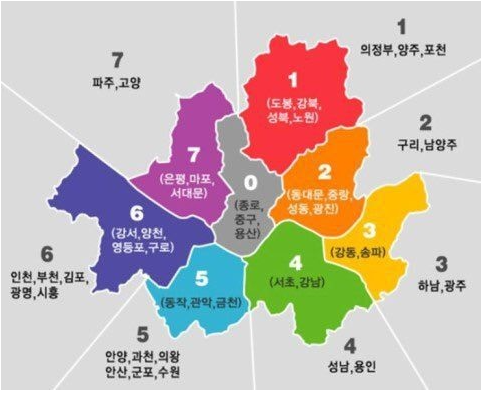


(1) 간선버스 (파랑색)

* 1권역 기점: 강북구, 노원구, 도봉구, 성북구, 경기도 의정부시
    * 버스(33개) : 100, 101, 102, 103, 104, 105, 106, 107, 109, 110A, 110B, 111, 120, 121, 130, 140, 141, 142, 143, 144, 145, 146, 147,148, 150, 151, 152, 153, 160, 162, 171, 172, 173
* 2권역 기점: 동대문구, 중랑구, 성동구, 광진구, 경기도 구리시, 남양주시
    * 버스(12개) : 201, 202, 240, 241, 242, 260, 261, 262, 270, 271, 272, 273
* 3권역 기점: 강동구, 송파구, 경기도 성남시
    * 버스(13개) : 301, 302, 303, 320, 333, 340, 341, 342, 343, 350, 360, 362, 370
* 4권역 기점: 강남구, 서초구, 경기도 성남시, 마포구, 의왕시
    * 버스(14개) : 400, 401, 402, 405, 406, 420, 421, 440, 441, 452, 461, 463, 470, 472
* 5권역 기점: 관악구, 금천구, 동작구, 경기도 과천시, 군포시, 안양시, 의왕시, 광명시
    * 버스(12개) : 500, 501, 502, 503, 504, 505, 506, 507, 540, 541, 542, 571
* 6권역 기점: 강서구, 구로구, 양천구, 영등포구, 경기도 광명시, 김포시, 부천시
    * 버스(21개) : 600, 601, 602, 603, 604, 605, 606, 640, 641, 643, 650, 651, 652, 653, 654, 660, 661, 662, 672, 673, 674
* 7권역 기점: 마포구, 서대문구, 은평구, 경기도 고양시, 파주시, 양주시(장흥면)
    * 버스(22개) : 700, 701, 702A, 702B, 704, 705, 707, 708, 710, 720, 721, 740, 741, 742, 750A, 750B, 752, 753, 761, 771, 773, 774
    
(2) 지선버스 (초록색)

* 0권역 기점: 용산구, 종로구, 중구
    * 버스(1개) : 0017
* 1권역 기점: 강북구, 노원구, 도봉구, 성북구, 경기도 양주시(장흥면 제외), 의정부시, 남양주시
    * 버스(45개) : 1014,1017,1020,1111,1113,1114,1115,1116,1119,1120,1122,1124,1126,1127,1128,1129,1130,1131,1132,1133,1135,1136,1137,1138,1139,1140,1141,1142,1143,1144,1154,1155,1156,1162,1164,1165,1167,1213,1218,1221,1222,1224,1226,1227,1711
* 2권역 기점: 동대문구, 중랑구, 성동구, 광진구, 경기도 구리시, 남양주시
    * 버스(23개) : 2012,2013,2014,2015,2016,2112,2113,2114,2115,2211,2221,2222,2224,2227,2230,2233,2234,2235,2311,2312,2412,2413,2415
* 3권역 기점: 강동구, 송파구, 경기도 하남시
    * 버스(26개) : 3011,3012,3212,3214,3216,3217,3220,3313,3314,3315,3316,3317,3318,3319,3321,3322,3323,3411,3412,3413,3414,3416,3417,3422,3425,3426
* 4권역 기점: 강남구, 서초구, 경기도 성남시
    * 버스(11개) : 4211,4212,4312,4318,4319,4419,4432,4432,4433,4433,4435
* 5권역 기점: 관악구, 금천구, 동작구, 경기도 과천시, 군포시, 안양시, 의왕시, 광명시
    * 버스(36개) : 5012,5413,5511,5513,5515,5516,5517,5519,5522,5523,5524,5525,5528,5530,5531,5535,5536,5537,5615,5616,5617,5618,5619,5620,5621,5623,5624,5625,5626,5627,5630,5633,5634,5712,5713,5714
* 6권역 기점: 강서구, 구로구, 양천구, 영등포구, 경기도 광명시, 김포시, 부천시
    * 버스(39개) : 6211,6411,6511,6512,6513,6514,6515,6516,6611,6613,6614,6615,6616,6617,6620,6623,6624,6625,6627,6628,6629,6630,6631,6632,6635,6637,6640A,6640B,6642,6645,6647,6648,6649,6654,6657,6712,6714,6715,6716
* 7권역 기점: 마포구, 서대문구, 은평구, 경기도 고양시, 파주시, 양주시(장흥면)
    * 버스(31개) : 7011,7013A,7013B,7016,7017,7018,7019,7021,7022,7024,7025,7211,7212,7611,7612,7613,7711,7713,7715,7719,7720,7722,7723,7726,7727,7728,7730,7734,7737,7738,7739
* 맞춤버스: 랜덤
     * 버스(14개) : 8002,8003,8112,8221,8331,8441,8541,8551,8552,8761,8771,8772,8774,8777
     
(3) 광역버스 (빨간색) (특징 : 지역을 되게 많이 지나감)

* 버스(9개) : 9401,9403,9404,9408,9409,9701,9703,9707,9711,9714

(4) 순환버스 (노란색) (특징 : 중심부만 지나감)

* 버스(5개) : 01A,01B,02,03,04

(5) 공항버스

* 버스 데이터가 안들어있음.

(6) 시티투어버스

* 시티투어버스 데이터 안들어있음

(7) 마을버스

* 각 지역이름이 앞에 붙어있음!

(8) 심야버스 (특징 : 지역을 되게 많이 지나감)

* 버스(11개) : N13, N15, N16, N26, N30, N37, N61, N37, N61, N62, N65
     
* 첨부 파일
https://ko.wikipedia.org/wiki/%EC%84%9C%EC%9A%B8%ED%8A%B9%EB%B3%84%EC%8B%9C%EC%9D%98_%EA%B0%84%EC%84%A0%EB%B2%84%EC%8A%A4_%EB%85%B8%EC%84%A0_%EB%AA%A9%EB%A1%9D

* 1

## 간선버스 (파랑색)

In [41]:
gansun_data = ["100", "101", "102", "103", "104", "105", "106", "107", "109",
          "110A", "110B", "111", "120", "121", "130", "140", "141", "142",
          "143", "144", "145", "146", "147","148", "150", "151", "152", "153",
          "160", "162", "171", "172", "173", '201', '202', '240', '241', '242',
          '260', '261', '262', '270', '271', '272', '273', '301', '302', '303',
          '320', '333', '340', '341', '342', '343', '350', '360', '362', '370',
          '400', '401', '402', '405', '406', '420', '421', '440', '441', '452',
          '461', '463', '470', '472', '500', '501', '502', '503', '504', '505',
          '506', '507', '540', '541', '542', '571', '600', '601', '602', '603',
          '604', '605', '606', '640', '641', '643', '650', '651', '652', '653',
          '654', '660', '661', '662', '672', '673', '674', '700', '701', '702A',
          '702B', '704', '705', '707', '708', '710', '720', '721', '740', '741',
          '742', '750A', '750B', '752', '753', '761', '771', '773', '774', '108',
            '407','775','271B'
         ]

In [42]:
gansun = df.filter(df.노선번호.isin(gansun_data))
gansun.show()

+----------+--------+----------------------+-----------------+---------------------------------+------------+------------+--------+
|  사용일자|노선번호|                노선명|버스정류장ARS번호|                             역명|승차총승객수|하차총승객수|이용객수|
+----------+--------+----------------------+-----------------+---------------------------------+------------+------------+--------+
|2018-09-26|     100|100번(하계동~용산구청)|            11310|월계주공108동앞롯데캐슬루나아파트|         217|          92|     309|
|2018-09-26|     100|100번(하계동~용산구청)|            03223|                 이촌동현대아파트|         229|          54|     283|
|2018-09-26|     100|100번(하계동~용산구청)|            11339|                 월계헬스케어센터|         138|          71|     209|
|2018-09-26|     100|100번(하계동~용산구청)|            11311|                         인덕대학|         119|          81|     200|
|2018-09-26|     100|100번(하계동~용산구청)|            11452|                   하계극동아파트|         173|          33|     206|
|2018-09-26|     100|100번(하계동~용산구청)|            11454|        

In [10]:
#간선버스 정보 확인
gansun.select("노선번호").distinct().collect()

[Row(노선번호='100'),
 Row(노선번호='101'),
 Row(노선번호='102'),
 Row(노선번호='103'),
 Row(노선번호='104'),
 Row(노선번호='105'),
 Row(노선번호='106'),
 Row(노선번호='107'),
 Row(노선번호='108'),
 Row(노선번호='109'),
 Row(노선번호='110A'),
 Row(노선번호='110B'),
 Row(노선번호='111'),
 Row(노선번호='120'),
 Row(노선번호='121'),
 Row(노선번호='130'),
 Row(노선번호='140'),
 Row(노선번호='141'),
 Row(노선번호='142'),
 Row(노선번호='143'),
 Row(노선번호='144'),
 Row(노선번호='145'),
 Row(노선번호='146'),
 Row(노선번호='147'),
 Row(노선번호='148'),
 Row(노선번호='150'),
 Row(노선번호='151'),
 Row(노선번호='152'),
 Row(노선번호='153'),
 Row(노선번호='160'),
 Row(노선번호='162'),
 Row(노선번호='171'),
 Row(노선번호='172'),
 Row(노선번호='173'),
 Row(노선번호='201'),
 Row(노선번호='202'),
 Row(노선번호='240'),
 Row(노선번호='241'),
 Row(노선번호='242'),
 Row(노선번호='260'),
 Row(노선번호='261'),
 Row(노선번호='262'),
 Row(노선번호='270'),
 Row(노선번호='271'),
 Row(노선번호='272'),
 Row(노선번호='273'),
 Row(노선번호='301'),
 Row(노선번호='302'),
 Row(노선번호='303'),
 Row(노선번호='320'),
 Row(노선번호='333'),
 Row(노선번호='340'),
 Row(노선번호='341'),
 Row(노선번호='342'),
 Row(노선번호='343'),
 Row(노선번

## 지선버스 (초록색)

In [11]:
jisun_data = ['0017','1014','1017','1020','1111','1113','1114','1115','1116',
              '1119','1120','1122','1124','1126','1127','1128','1129','1130',
              '1131','1132','1133','1135','1136','1137','1138','1139','1140',
              '1141','1142','1143','1144','1154','1155','1156','1162','1164',
              '1165','1167','1213','1218','1221','1222','1224','1226','1227',
              '1711','2012','2013','2014','2015','2016','2112','2113','2114',
              '2115','2211','2221','2222','2224','2227','2230','2233','2234',
              '2235','2311','2312','2412','2413','2415','3011','3012','3212',
              '3214','3216','3217','3220','3313','3314','3315','3316','3317',
              '3318','3319','3321','3322','3323','3411','3412','3413','3414',
              '3416','3417','3422','3425','3426','4211','4212','4312','4318',
              '4319','4419','4432','4432','4433','4433','4435', '5012','5413',
              '5511','5513','5515','5516','5517','5519','5522','5523','5524',
              '5525','5528','5530','5531','5535','5536','5537','5615','5616',
              '5617','5618','5619','5620','5621','5623','5624','5625','5626',
              '5627','5630','5633','5634','5712','5713','5714','6211','6411',
              '6511','6512','6513','6514','6515','6516','6611','6613','6614',
              '6615','6616','6617','6620','6623','6624','6625','6627','6628',
              '6629','6630','6631','6632','6635','6637','6638','6640A','6640B','6642',
              '6645','6647','6648','6649','6654','6657','6712','6714','6715',
              '6716','7011','7013A','7013B','7016','7017','7018','7019','7021',
              '7022','7024','7025','7211','7212','7611','7612','7613','7711',
              '7713','7715','7719','7720','7722','7723','7726','7727','7728',
              '7730','7734','7737','7738','7739','8002','8003','8112','8221',
              '8331','8441','8541','8551','8552','8761','8771','8772','8774',
              '8777','1166','8111'
         ]

In [12]:
jisun = df.filter(df.노선번호.isin(jisun_data))
jisun.show()

+----------+--------+---------------------+-----------------+----------------------------+------------+------------+--------+
|  사용일자|노선번호|               노선명|버스정류장ARS번호|                        역명|승차총승객수|하차총승객수|이용객수|
+----------+--------+---------------------+-----------------+----------------------------+------------+------------+--------+
|2020-10-03|    0017|0017번(청암동~이촌동)|            03248|                    용문시장|          38|          66|     104|
|2020-10-03|    0017|0017번(청암동~이촌동)|            03287|    이촌119안전센터.성촌공원|           2|          38|      40|
|2020-10-03|    0017|0017번(청암동~이촌동)|            03249|            용산전자상가입구|           4|          50|      54|
|2020-10-03|    0017|0017번(청암동~이촌동)|            03256|            용산푸르지오써밋|           7|          24|      31|
|2020-10-03|    0017|0017번(청암동~이촌동)|            03306|                      산천동|         126|           2|     128|
|2020-10-03|    0017|0017번(청암동~이촌동)|            03304|             원효2동주민센터|          72|       

In [13]:
#지선버스 정보 확인
jisun.select("노선번호").distinct().collect()

[Row(노선번호='0017'),
 Row(노선번호='1014'),
 Row(노선번호='1017'),
 Row(노선번호='1020'),
 Row(노선번호='1111'),
 Row(노선번호='1113'),
 Row(노선번호='1114'),
 Row(노선번호='1115'),
 Row(노선번호='1116'),
 Row(노선번호='1119'),
 Row(노선번호='1120'),
 Row(노선번호='1122'),
 Row(노선번호='1124'),
 Row(노선번호='1126'),
 Row(노선번호='1127'),
 Row(노선번호='1128'),
 Row(노선번호='1129'),
 Row(노선번호='1130'),
 Row(노선번호='1131'),
 Row(노선번호='1132'),
 Row(노선번호='1133'),
 Row(노선번호='1135'),
 Row(노선번호='1136'),
 Row(노선번호='1137'),
 Row(노선번호='1138'),
 Row(노선번호='1139'),
 Row(노선번호='1140'),
 Row(노선번호='1141'),
 Row(노선번호='1142'),
 Row(노선번호='1143'),
 Row(노선번호='1144'),
 Row(노선번호='1154'),
 Row(노선번호='1155'),
 Row(노선번호='1156'),
 Row(노선번호='1162'),
 Row(노선번호='1164'),
 Row(노선번호='1165'),
 Row(노선번호='1166'),
 Row(노선번호='1167'),
 Row(노선번호='1213'),
 Row(노선번호='1218'),
 Row(노선번호='1221'),
 Row(노선번호='1222'),
 Row(노선번호='1224'),
 Row(노선번호='1226'),
 Row(노선번호='1227'),
 Row(노선번호='1711'),
 Row(노선번호='2012'),
 Row(노선번호='2013'),
 Row(노선번호='2014'),
 Row(노선번호='2015'),
 Row(노선번호='2016'),
 Row(노선번호='2

## 광역버스 (빨간색)

In [14]:
Gwangyeog_data = ['9401','9403','9404','9408','9409','9701','9703','9707','9711','9709', '9714']

In [15]:
Gwangyeog = df.filter(df.노선번호.isin(Gwangyeog_data))
Gwangyeog.show()

+----------+--------+---------------------+-----------------+------------------------------------+------------+------------+--------+
|  사용일자|노선번호|               노선명|버스정류장ARS번호|                                역명|승차총승객수|하차총승객수|이용객수|
+----------+--------+---------------------+-----------------+------------------------------------+------------+------------+--------+
|2020-10-03|    9401|9401번(구미동~서울역)|            47024|                 샛별마을.우방아파트|          81|           4|      85|
|2020-10-03|    9401|9401번(구미동~서울역)|            47631|                       백현마을2단지|         104|          31|     135|
|2020-10-03|    9401|9401번(구미동~서울역)|            47017|                            푸른마을|         253|          11|     264|
|2020-10-03|    9401|9401번(구미동~서울역)|            47029|                   한솔마을.LG아파트|          67|           4|      71|
|2020-10-03|    9401|9401번(구미동~서울역)|            47170|                           주공4단지|         135|           0|     135|
|2020-10-03|    9401|9401번(구미

In [16]:
#광역버스 정보 확인
Gwangyeog.select("노선번호").distinct().collect()

[Row(노선번호='9401'),
 Row(노선번호='9403'),
 Row(노선번호='9404'),
 Row(노선번호='9408'),
 Row(노선번호='9409'),
 Row(노선번호='9701'),
 Row(노선번호='9703'),
 Row(노선번호='9707'),
 Row(노선번호='9709'),
 Row(노선번호='9711'),
 Row(노선번호='9714')]

## 순환버스

In [17]:
soonhwan_data = ['01A','01B','02','03','04','05']

In [18]:
soonhwan = df.filter(df.노선번호.isin(soonhwan_data))
soonhwan.show()

+----------+--------+--------------------------------+-----------------+------------------------+------------+------------+--------+
|  사용일자|노선번호|                          노선명|버스정류장ARS번호|                    역명|승차총승객수|하차총승객수|이용객수|
+----------+--------+--------------------------------+-----------------+------------------------+------------+------------+--------+
|2020-01-29|     01A|01A번(서울역환승센터~서울역환...|            02003|      서울역버스환승센터|           4|          12|      16|
|2020-01-29|     01A|01A번(서울역환승센터~서울역환...|            02160|               을지로3가|           3|           1|       4|
|2020-01-29|     01A|01A번(서울역환승센터~서울역환...|            02118|         숭례문.한국일보|           0|           3|       3|
|2020-01-29|     01A|01A번(서울역환승센터~서울역환...|            02127|       북창동.남대문시장|           2|           2|       4|
|2020-01-29|     01A|01A번(서울역환승센터~서울역환...|            01128|                  사직단|           1|           2|       3|
|2020-01-29|     01A|01A번(서울역환승센터~서울역환...|            01127| 서울

In [19]:
#순환버스 정보 확인
soonhwan.select("노선번호").distinct().collect()

[Row(노선번호='01A'),
 Row(노선번호='01B'),
 Row(노선번호='02'),
 Row(노선번호='03'),
 Row(노선번호='04'),
 Row(노선번호='05')]

## 심야버스

In [20]:
night_data = ['N13', 'N15', 'N16', 'N26', 'N30', 'N37', 'N61', 'N37', 'N61',
             'N62', 'N65', 'N824','N854','N866','N877',"N850", "N876"]

In [21]:
night = df.filter(df.노선번호.isin(night_data))
night.show()

+----------+--------+----------------------------------+-----------------+-----------------------------+------------+------------+--------+
|  사용일자|노선번호|                            노선명|버스정류장ARS번호|                         역명|승차총승객수|하차총승객수|이용객수|
+----------+--------+----------------------------------+-----------------+-----------------------------+------------+------------+--------+
|2018-09-26|     N13|N13번(상계동차고지~송파공영차고지)|            11104|            태릉입구역3번출구|           6|           3|       9|
|2018-09-26|     N13|N13번(상계동차고지~송파공영차고지)|            23305|                     한서병원|           0|           2|       2|
|2018-09-26|     N13|N13번(상계동차고지~송파공영차고지)|            08209|                     돌곶이역|           6|           3|       9|
|2018-09-26|     N13|N13번(상계동차고지~송파공영차고지)|            11481|              석계역1번출구.B|           8|           1|       9|
|2018-09-26|     N13|N13번(상계동차고지~송파공영차고지)|            01288|           종로중부새마을금고|           3|           1|       4|
|2018-09-26|     

In [22]:
#심야버스 정보 확인
night.select("노선번호").distinct().collect()

[Row(노선번호='N13'),
 Row(노선번호='N15'),
 Row(노선번호='N16'),
 Row(노선번호='N26'),
 Row(노선번호='N30'),
 Row(노선번호='N37'),
 Row(노선번호='N61'),
 Row(노선번호='N62'),
 Row(노선번호='N65'),
 Row(노선번호='N824'),
 Row(노선번호='N850'),
 Row(노선번호='N854'),
 Row(노선번호='N866'),
 Row(노선번호='N876'),
 Row(노선번호='N877')]

## 마을버스

In [23]:
town_data = ['강남01','강남02','강남03','강남05','강남06','강남06-1','강남06-2',
             '강남07','강남08','강남10','강동01','강동02','강동05','강북01',
             '강북02','강북03','강북04','강북05','강북06','강북08','강북09',
             '강북10','강북11','강북12','강서01','강서02','강서03','강서04',
             '강서05','강서05-1','강서06','강서07','관악01','관악02','관악03','관악04',
             '관악05','관악06','관악07','관악08','관악10','관악11','광진01',
             '광진02','광진03','광진04','광진05','구로01','구로02','구로03',
             '구로04','구로05','구로06','구로07','구로08','구로09','구로10',
             '구로11','구로12','구로13','구로14','구로15','금천01','금천01-1',
             '금천02','금천03','금천04','금천05','금천06','금천07','금천08',
             '금천09','금천11','노원01','노원02','노원03','노원04','노원05',
             '노원08','노원09','노원11','노원13','노원14','노원15','도봉01',
             '도봉02','도봉03','도봉04','도봉05','도봉06','도봉07','도봉08',
             '도봉09','동대문01','동대문02','동대문03','동대문05','동작01',
             '동작02','동작03','동작05','동작05-1','동작06','동작07','동작08',
             '동작09','동작10','동작11','동작12','동작13','동작14','동작15',
             '동작16','동작17','동작18','동작19','동작20','동작21','마포01',
             '마포02','마포03','마포05','마포06','마포07','마포08','마포09',
             '마포10','마포11','마포12','마포13','마포14','마포15','마포16',
             '마포17','마포18','마포18-1','서대문01','서대문02','서대문03',
             '서대문04','서대문05','서대문06','서대문07','서대문08','서대문09',
             '서대문10','서대문11','서대문12','서대문13','서대문14','서대문15',
             '서초01','서초02','서초03','서초05','서초06','서초07','서초08',
             '서초09','서초10','서초11','서초13','서초14','서초15','서초16',
             '서초17','서초18','서초18-1','서초20','서초21','서초22','성동01',
             '성동02','성동03','성동03-1','성동03-2','성동05','성동06','성동07',
             '성동08','성동09','성동10','성동12','성동13','성동14','성북01',
             '성북02','성북03','성북04','성북05','성북06','성북07','성북08',
             '성북09','성북10-1','성북10-2','성북12','성북13','성북14-1',
             '성북14-2','성북15','성북20','성북21','성북22','양천01','양천02',
             '양천03','양천04','영등포01','영등포02','영등포03','영등포04',
             '영등포05','영등포06','영등포07','영등포08','영등포09','영등포10',
             '영등포11','영등포12','영등포13','용산01','용산02','용산03',
             '용산04','은평01','은평02','은평03','은평04','은평05','은평06',
             '은평07','은평08','은평08-1','은평08-2','은평09','은평10','종로01',
             '종로02','종로03','종로05','종로06','종로07','종로08','종로09',
             '종로11','종로12','종로13','중랑01','중랑02']

In [24]:
town = df.filter(df.노선번호.isin(town_data))
town.show()

+----------+--------+-------------------------------+-----------------+-----------------------------+------------+------------+--------+
|  사용일자|노선번호|                         노선명|버스정류장ARS번호|                         역명|승차총승객수|하차총승객수|이용객수|
+----------+--------+-------------------------------+-----------------+-----------------------------+------------+------------+--------+
|2021-04-07|  강남01|강남01(일원동한솔아파트~코엑스)|            23818|                   코엑스동문|         337|          63|     400|
|2021-04-08|  강남01|강남01(일원동한솔아파트~코엑스)|            23552|             삼성서울병원정문|          58|          41|      99|
|2021-04-07|  강남01|강남01(일원동한솔아파트~코엑스)|            23858|    봉은사역.삼성래미안아파트|         134|           5|     139|
|2021-04-07|  강남01|강남01(일원동한솔아파트~코엑스)|            23546|                       일원역|         685|          32|     717|
|2021-04-07|  강남01|강남01(일원동한솔아파트~코엑스)|            23855|             노블발렌티웨딩홀|         230|          86|     316|
|2021-04-07|  강남01|강남01(일원동한솔아파트~코엑스)|            2

In [25]:
#마을버스 정보 확인
town.select("노선번호").distinct().collect()

[Row(노선번호='강남01'),
 Row(노선번호='강남02'),
 Row(노선번호='강남03'),
 Row(노선번호='강남05'),
 Row(노선번호='강남06'),
 Row(노선번호='강남06-1'),
 Row(노선번호='강남06-2'),
 Row(노선번호='강남07'),
 Row(노선번호='강남08'),
 Row(노선번호='강남10'),
 Row(노선번호='강동01'),
 Row(노선번호='강동02'),
 Row(노선번호='강동05'),
 Row(노선번호='강북01'),
 Row(노선번호='강북02'),
 Row(노선번호='강북03'),
 Row(노선번호='강북04'),
 Row(노선번호='강북05'),
 Row(노선번호='강북06'),
 Row(노선번호='강북08'),
 Row(노선번호='강북09'),
 Row(노선번호='강북10'),
 Row(노선번호='강북11'),
 Row(노선번호='강북12'),
 Row(노선번호='강서01'),
 Row(노선번호='강서02'),
 Row(노선번호='강서03'),
 Row(노선번호='강서04'),
 Row(노선번호='강서05'),
 Row(노선번호='강서05-1'),
 Row(노선번호='강서06'),
 Row(노선번호='강서07'),
 Row(노선번호='관악01'),
 Row(노선번호='관악02'),
 Row(노선번호='관악03'),
 Row(노선번호='관악04'),
 Row(노선번호='관악05'),
 Row(노선번호='관악06'),
 Row(노선번호='관악07'),
 Row(노선번호='관악08'),
 Row(노선번호='관악10'),
 Row(노선번호='관악11'),
 Row(노선번호='광진01'),
 Row(노선번호='광진02'),
 Row(노선번호='광진03'),
 Row(노선번호='광진04'),
 Row(노선번호='광진05'),
 Row(노선번호='구로01'),
 Row(노선번호='구로02'),
 Row(노선번호='구로03'),
 Row(노선번호='구로04'),
 Row(노선번호='구로05'),
 Row(노

In [26]:
import pyspark.sql.types as T
import pyspark.sql.functions as F

In [43]:
#버스 종류 컬럼 생성
bus = df.withColumn('버스종류', F.when(df.노선번호.isin(gansun_data),"간선"))
bus = bus.withColumn('버스종류', F.when(df.노선번호.isin(jisun_data),"지선").otherwise(F.col("버스종류")))
bus = bus.withColumn('버스종류', F.when(df.노선번호.isin(Gwangyeog_data),"광역").otherwise(F.col("버스종류")))
bus = bus.withColumn('버스종류', F.when(df.노선번호.isin(soonhwan_data),"순환").otherwise(F.col("버스종류")))
bus = bus.withColumn('버스종류', F.when(df.노선번호.isin(night_data),"심야").otherwise(F.col("버스종류")))
bus = bus.withColumn('버스종류', F.when(df.노선번호.isin(town_data),"마을").otherwise(F.col("버스종류")))
bus.show()

+----------+--------+---------------------+-----------------+----------------------------+------------+------------+--------+--------+
|  사용일자|노선번호|               노선명|버스정류장ARS번호|                        역명|승차총승객수|하차총승객수|이용객수|버스종류|
+----------+--------+---------------------+-----------------+----------------------------+------------+------------+--------+--------+
|2019-03-20|    0017|0017번(청암동~이촌동)|            03003|                    신용산역|         203|         443|     646|    지선|
|2019-03-20|    0017|0017번(청암동~이촌동)|            03248|                    용문시장|          90|         170|     260|    지선|
|2019-03-20|    0017|0017번(청암동~이촌동)|            03298|        청암동강변삼성아파트|          73|         138|     211|    지선|
|2019-03-20|    0017|0017번(청암동~이촌동)|            03122|                한강대교북단|         283|         202|     485|    지선|
|2019-03-20|    0017|0017번(청암동~이촌동)|            03290|             이촌2동주민센터|          38|         232|     270|    지선|
|2019-03-20|    0017|0017번(청암동~이촌동)|

In [29]:
#버스종류 컬럼 확인
bus.select("버스종류").distinct().collect()

[Row(버스종류=None),
 Row(버스종류='순환'),
 Row(버스종류='심야'),
 Row(버스종류='간선'),
 Row(버스종류='마을'),
 Row(버스종류='광역'),
 Row(버스종류='지선')]

In [30]:
#버스종류 Null 값 확인
bus.where(F.col('버스종류').isNull()==True).count()

726442

In [31]:
#어떤 버스를 빼먹었는지 확인!
bus.where(F.col('버스종류').isNull()==True).select('노선번호').distinct().collect()

[Row(노선번호='271A'),
 Row(노선번호='271B'),
 Row(노선번호='4412'),
 Row(노선번호='462'),
 Row(노선번호='471'),
 Row(노선번호='5522A'),
 Row(노선번호='5522B'),
 Row(노선번호='5534'),
 Row(노선번호='670'),
 Row(노선번호='751'),
 Row(노선번호='9711A')]

In [32]:
#빼먹은 버스 개수
bus.where(F.col('버스종류').isNull()==True).select('노선번호').distinct().count()

11

## 빼먹은 버스 특이사항

(1) 간선버스
* 108 >> 2021년 8월 2일 폐지
* 407 >> 2018년 8월 24일 폐지
* 775 >> 2018년 5월 1일 폐지
* 271A >> 271번으로 명칭 변경
* 271B >> 2021년 3월 27일 폐지
* 462 >> 452로 명칭 변경
* 471 >> 741로 명칭 변경
* 670 >> 660으로 명칭 변경
* 751 >> 741로 명칭 변경

(2) 지선버스
* 1166 >> 2018년 8월 24일 폐지
* 4412 >> 4312로 명칭 변경
* 5522A >> 5522로 명칭 변경
* 5522B >> 5522로 명칭 변경
* 5534 >> 5634로 명칭 변경
* 8111 >> 2018년 8월 27일 폐지

(3) 광역버스
* 9709 >> 2020년 폐지되었는데 파주버스로 넘어감.
* 9711A >> 9711로 변경

(4) 순환버스
* 05 >> 2020년 1월29일 폐지 

(5) 심야버스
* N824, N854, N866, N877 >> 2018년에만 운행함
* N850 >> 2019년 12월18일부터 2020년 1월12일까지 수요일부터 일요일에만 운행함.
* N876 >> 코로나 이후 운행 중단

(6) 마을버스
* 변경사항 없음

In [50]:
#명칭 변경된 버스 전처리 해주기
from itertools import chain

In [51]:
#변경할 버스 딕셔너리 생성
change_bus = {'271A':"271", "462":"452", "471":"741", "670":"660", "751":"741",
              "4412":"4312","5522A":"5522", "5522B":"5522", "5534":"5634",
              "9711A":"9711"
             }
change_bus_list = []
for key in change_bus:
    change_bus_list.append(key)

In [52]:
#chain을 이용해 버스번호 변경
expr = F.create_map([F.lit(x) for x in chain(*change_bus.items())])
bus = bus.withColumn("노선번호", F.when(bus.노선번호.isin(change_bus_list), expr[F.col("노선번호")]).otherwise(bus.노선번호))

In [53]:
#정렬 다시해주기
bus = bus.orderBy("노선번호")

In [54]:
bus.select("노선번호").distinct().collect()

[Row(노선번호='0017'),
 Row(노선번호='01A'),
 Row(노선번호='01B'),
 Row(노선번호='02'),
 Row(노선번호='03'),
 Row(노선번호='04'),
 Row(노선번호='05'),
 Row(노선번호='100'),
 Row(노선번호='101'),
 Row(노선번호='1014'),
 Row(노선번호='1017'),
 Row(노선번호='102'),
 Row(노선번호='1020'),
 Row(노선번호='103'),
 Row(노선번호='104'),
 Row(노선번호='105'),
 Row(노선번호='106'),
 Row(노선번호='107'),
 Row(노선번호='108'),
 Row(노선번호='109'),
 Row(노선번호='110A'),
 Row(노선번호='110B'),
 Row(노선번호='111'),
 Row(노선번호='1111'),
 Row(노선번호='1113'),
 Row(노선번호='1114'),
 Row(노선번호='1115'),
 Row(노선번호='1116'),
 Row(노선번호='1119'),
 Row(노선번호='1120'),
 Row(노선번호='1122'),
 Row(노선번호='1124'),
 Row(노선번호='1126'),
 Row(노선번호='1127'),
 Row(노선번호='1128'),
 Row(노선번호='1129'),
 Row(노선번호='1130'),
 Row(노선번호='1131'),
 Row(노선번호='1132'),
 Row(노선번호='1133'),
 Row(노선번호='1135'),
 Row(노선번호='1136'),
 Row(노선번호='1137'),
 Row(노선번호='1138'),
 Row(노선번호='1139'),
 Row(노선번호='1140'),
 Row(노선번호='1141'),
 Row(노선번호='1142'),
 Row(노선번호='1143'),
 Row(노선번호='1144'),
 Row(노선번호='1154'),
 Row(노선번호='1155'),
 Row(노선번호='1156'),
 Row(노선번호='116

In [55]:
#다시 버스 종류 컬럼 생성
bus2 = bus.withColumn('버스종류', F.when(bus.노선번호.isin(gansun_data),"간선"))
bus2 = bus2.withColumn('버스종류', F.when(bus2.노선번호.isin(jisun_data),"지선").otherwise(F.col("버스종류")))
bus2 = bus2.withColumn('버스종류', F.when(bus2.노선번호.isin(Gwangyeog_data),"광역").otherwise(F.col("버스종류")))
bus2 = bus2.withColumn('버스종류', F.when(bus2.노선번호.isin(soonhwan_data),"순환").otherwise(F.col("버스종류")))
bus2 = bus2.withColumn('버스종류', F.when(bus2.노선번호.isin(night_data),"심야").otherwise(F.col("버스종류")))
bus2 = bus2.withColumn('버스종류', F.when(bus2.노선번호.isin(town_data),"마을").otherwise(F.col("버스종류")))
bus2.show()

+----------+--------+---------------------+-----------------+----------------------------+------------+------------+--------+--------+
|  사용일자|노선번호|               노선명|버스정류장ARS번호|                        역명|승차총승객수|하차총승객수|이용객수|버스종류|
+----------+--------+---------------------+-----------------+----------------------------+------------+------------+--------+--------+
|2021-04-07|    0017|0017번(청암동~이촌동)|            03247|                    용문시장|         181|          60|     241|    지선|
|2021-04-07|    0017|0017번(청암동~이촌동)|            03290|             이촌2동주민센터|          32|         203|     235|    지선|
|2021-04-07|    0017|0017번(청암동~이촌동)|            03312|                  새마을금고|         163|         117|     280|    지선|
|2021-04-07|    0017|0017번(청암동~이촌동)|            03310|                남이장군사당|          51|          53|     104|    지선|
|2021-04-07|    0017|0017번(청암동~이촌동)|            03308|            신창동세방아파트|         180|          11|     191|    지선|
|2021-04-07|    0017|0017번(청암동~이촌동)

In [56]:
#빼먹은 버스 개수 다시 확인
bus2.where(F.col('버스종류').isNull()==True).select('노선번호').distinct().count()

0

In [57]:
#어떤 버스를 빼먹었는지 다시 확인!
bus2.where(F.col('버스종류').isNull()==True).select('노선번호').distinct().collect()

[]

In [59]:
#버스종류별 승차총승객수
bus3 = bus2.groupby("버스종류").agg(F.sum("승차총승객수").alias("승차총승객수"))
bus3.show()

+--------+------------+
|버스종류|승차총승객수|
+--------+------------+
|    순환|     7713921|
|    심야|    13833896|
|    간선|  2574684024|
|    마을|  1404426323|
|    광역|    51162366|
|    지선|  2329552406|
+--------+------------+



In [113]:
bus2.printSchema()

root
 |-- 사용일자: date (nullable = true)
 |-- 노선번호: string (nullable = true)
 |-- 노선명: string (nullable = true)
 |-- 버스정류장ARS번호: string (nullable = true)
 |-- 역명: string (nullable = true)
 |-- 승차총승객수: integer (nullable = true)
 |-- 하차총승객수: integer (nullable = true)
 |-- 이용객수: integer (nullable = true)
 |-- 버스종류: string (nullable = true)



In [114]:
#코로나 이전 이후로 비교해보자!
#코로나 이전 = "previous", 코로나 이후 = "post"
result =  bus2.withColumn('코로나', F.when(df.사용일자 > '2020-01-19', "post").otherwise("previous"))
result.show()

+----------+--------+---------------------+-----------------+----------------------------+------------+------------+--------+--------+--------+
|  사용일자|노선번호|               노선명|버스정류장ARS번호|                        역명|승차총승객수|하차총승객수|이용객수|버스종류|  코로나|
+----------+--------+---------------------+-----------------+----------------------------+------------+------------+--------+--------+--------+
|2019-03-20|    0017|0017번(청암동~이촌동)|            03003|                    신용산역|         203|         443|     646|    지선|previous|
|2019-03-20|    0017|0017번(청암동~이촌동)|            03248|                    용문시장|          90|         170|     260|    지선|previous|
|2019-03-20|    0017|0017번(청암동~이촌동)|            03298|        청암동강변삼성아파트|          73|         138|     211|    지선|previous|
|2019-03-20|    0017|0017번(청암동~이촌동)|            03122|                한강대교북단|         283|         202|     485|    지선|previous|
|2019-03-20|    0017|0017번(청암동~이촌동)|            03290|             이촌2동주민센터|          38|      

In [107]:
#버스별 코로나이전이후 평균으로 집계
result = result.groupby('`코로나`', '`버스종류`').agg(F.mean('`승차총승객수`').alias('버스별이용자수')).orderBy(F.desc('`버스종류`'))
result.show()

+--------+--------+------------------+
|  코로나|버스종류|    버스별이용자수|
+--------+--------+------------------+
|    post|    지선| 93.82286705040725|
|previous|    지선|124.49122645147149|
|previous|    심야| 5.266230075811268|
|    post|    심야|3.7857631017590188|
|previous|    순환| 94.84875775170833|
|    post|    순환|27.644988225463386|
|previous|    마을|157.49223993839723|
|    post|    마을|109.28248925687784|
|previous|    광역| 42.94383273739662|
|    post|    광역|33.838970383580566|
|    post|    간선|126.12373390711747|
|previous|    간선|165.65356526954764|
+--------+--------+------------------+



In [108]:
#판다스로 변환.
result = result.select("*").toPandas()

In [110]:
#파켓 저장
result.to_parquet("post_and_previous_corona_mean_bus.parquet")

## 그래프 나타내기

In [85]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.font_manager as fm
import seaborn as sns

In [87]:
fm.get_fontconfig_fonts()
font_location = './NanumBarunGothic.ttf'
font_name = fm.FontProperties(fname=font_location).get_name()
plt.rc('font', family=font_name)

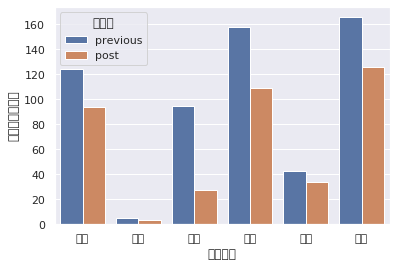

In [109]:
sns.barplot(x="버스종류" , y="버스별이용자수", hue="코로나", data=result)

In [111]:
#각 버스별로 parquet 저장
gansun.write.parquet("gansun_bus")
jisun.write.parquet("jisun_bus")
Gwangyeog.write.parquet("gwangyeng_bus")
soonhwan.write.parquet("soonhwan_bus")
night.write.parquet("night_bus")
town.write.parquet("town_bus")